In [13]:
cd /mnt/ssd1/home3/aiba/gmp

/mnt/ssd1/home3/aiba/gmp


In [14]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
def count_numeric_subfolders(folder_path):
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"エラー: 指定されたパスが見つかりません: {folder_path}")
    if not os.path.isdir(folder_path):
        raise NotADirectoryError(f"エラー: 指定されたパスはフォルダではありません: {folder_path}")
    numeric_folder_count = 0
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path) and item.isdigit():
            numeric_folder_count += 1
    return numeric_folder_count

In [16]:
def filter_co_occur(data, sample_name, data_len, max_co_occur, out_num):
    filted_data = []
    filted_sample_name = []
    filted_data_len = []
    for i in range(len(data)):
        compare = 0
        for j in range(len(data[i])):
            mutation = data[i][j].split(',')
            if compare < len(mutation):
                compare = len(mutation)
        if compare <= max_co_occur:
            filted_data.append(data[i])
            filted_sample_name.append(sample_name[i])
            filted_data_len.append(data_len[i])
        if len(filted_data) >= out_num:
            break
    return filted_data, filted_sample_name, filted_data_len

In [17]:
def import_mutation_paths(base_dir, strain):
    """
    指定されたstrainディレクトリからmutation_paths_"strain".tsvを読み込む。

    Parameters:
        base_dir (str): ベースディレクトリのパス。
        strain (str): 読み込み対象のstrain名。

    Returns:
        list: 読み込んだTSVファイルのパスのリスト。
    """
    # ホームディレクトリを展開
    base_dir = os.path.expanduser(base_dir)
    strain_dir = os.path.join(base_dir, strain)

    # strain直下のファイルパスを確認
    file_paths = []
    file_path = os.path.join(strain_dir, f"mutation_paths.tsv")
    if os.path.exists(file_path):
        file_paths.append(file_path)
    
    # strain/numサブディレクトリを探索
    else:
        if os.path.exists(strain_dir) and os.path.isdir(strain_dir):
            num_dirs = [d for d in os.listdir(strain_dir) if d.isdigit()]
            num_dirs.sort(key=int)  # 数字順にソート

            for num in num_dirs:
                file_path = os.path.join(strain_dir, num, f"mutation_paths.tsv")
                if os.path.exists(file_path):
                    file_paths.append(file_path)

    if not file_paths:
        raise FileNotFoundError(f"mutation_paths.tsvが{strain_dir}内に見つかりませんでした。")

    return file_paths


In [18]:
if __name__ == "__main__":
    # --- データ読み込み・前処理 ---
    dir = '../usher_output/'
    files =  sorted([filename for filename in os.listdir(dir) if not filename.startswith('.')])
    print(files)
    print(len(files))

    strains = files
    out_num = 1000000
    max_co_occur = 5

    # 全件データの読み込み
    names = []
    lengths = []
    paths = []
    path_strains = []

    strains_name = []
    strains_num = []
    for strain in strains:
        strain_num = 0
        file_paths = import_mutation_paths(dir,strain)
        for file_path in file_paths:
            #print(f"[INFO]import: {file_path}")
            f = open(file_path, 'r',encoding="utf-8_sig")
            datalist = f.readlines()
            f.close()
            for i in range(1,len(datalist)):
                data = datalist[i].split('\t')
                names.append(data[0])
                lengths.append(int(data[1]))
                paths.append(data[2].rstrip().split('>'))
                path_strains.append(strain)
                strain_num += 1
        print(f"[INFO]{strain} : {strain_num} samples loaded")
        strains_name.append(strain)
        strains_num.append(strain_num)
        
    print(f"[INFO] 全件読み込み完了: {len(paths)} サンプル")
    #filtered_paths, filtered_name, filtered_length = filter_co_occur(paths, names, lengths, max_co_occur, out_num)
    #print(f"[INFO] 共起数フィルタリング完了: {len(filtered_paths)} サンプル")
    max_timestep=max(lengths)

['A', 'A.1', 'AD.2', 'AY.1', 'AY.10', 'AY.100', 'AY.107', 'AY.109', 'AY.110', 'AY.111', 'AY.112', 'AY.113', 'AY.114', 'AY.116.1', 'AY.117', 'AY.118', 'AY.119', 'AY.119.2', 'AY.120', 'AY.120.1', 'AY.120.2.1', 'AY.121', 'AY.121.1', 'AY.122', 'AY.122.3', 'AY.124', 'AY.125', 'AY.126', 'AY.127', 'AY.129', 'AY.13', 'AY.14', 'AY.16', 'AY.2', 'AY.20', 'AY.23', 'AY.25', 'AY.25.1', 'AY.25.3', 'AY.26', 'AY.29', 'AY.3', 'AY.3.1', 'AY.32', 'AY.33', 'AY.34', 'AY.34.1', 'AY.35', 'AY.36', 'AY.36.1', 'AY.37', 'AY.39', 'AY.39.1', 'AY.39.1.1', 'AY.4', 'AY.4.1', 'AY.4.10', 'AY.4.15', 'AY.4.2', 'AY.4.2.1', 'AY.4.2.2', 'AY.4.2.3', 'AY.4.3', 'AY.4.4', 'AY.4.5', 'AY.4.6', 'AY.4.7', 'AY.4.8', 'AY.4.9', 'AY.41', 'AY.42', 'AY.43', 'AY.43.4', 'AY.43.6', 'AY.43.8', 'AY.44', 'AY.45', 'AY.46', 'AY.46.1', 'AY.46.4', 'AY.46.5', 'AY.46.6', 'AY.47', 'AY.48', 'AY.5', 'AY.5.3', 'AY.5.4', 'AY.54', 'AY.57', 'AY.6', 'AY.62', 'AY.64', 'AY.65', 'AY.67', 'AY.7', 'AY.7.1', 'AY.70', 'AY.8', 'AY.80', 'AY.84', 'AY.9', 'AY.9.2', 'AY

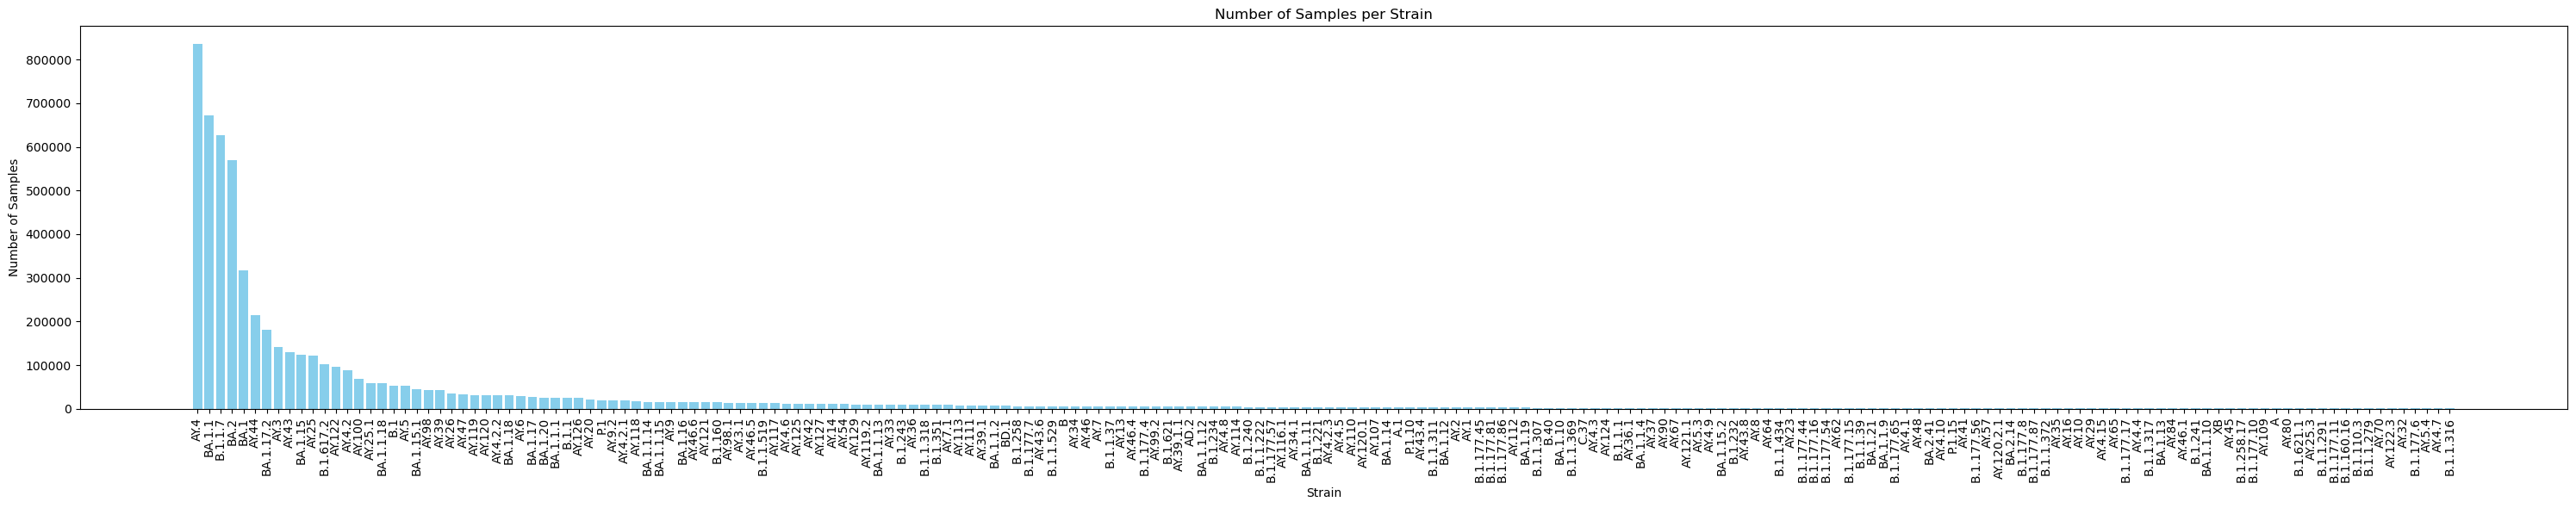

In [19]:
df = pd.DataFrame({'Strain': strains_name, 'Sample_Count': strains_num})
sorted_df = df.sort_values(by='Sample_Count', ascending=False)
plt.figure(figsize=(30, 6))
plt.bar(sorted_df['Strain'], sorted_df['Sample_Count'], color='skyblue')
plt.xlabel('Strain')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Strain')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Initial samples loaded: 5751671
Samples after removing duplicate sequences: 2857133


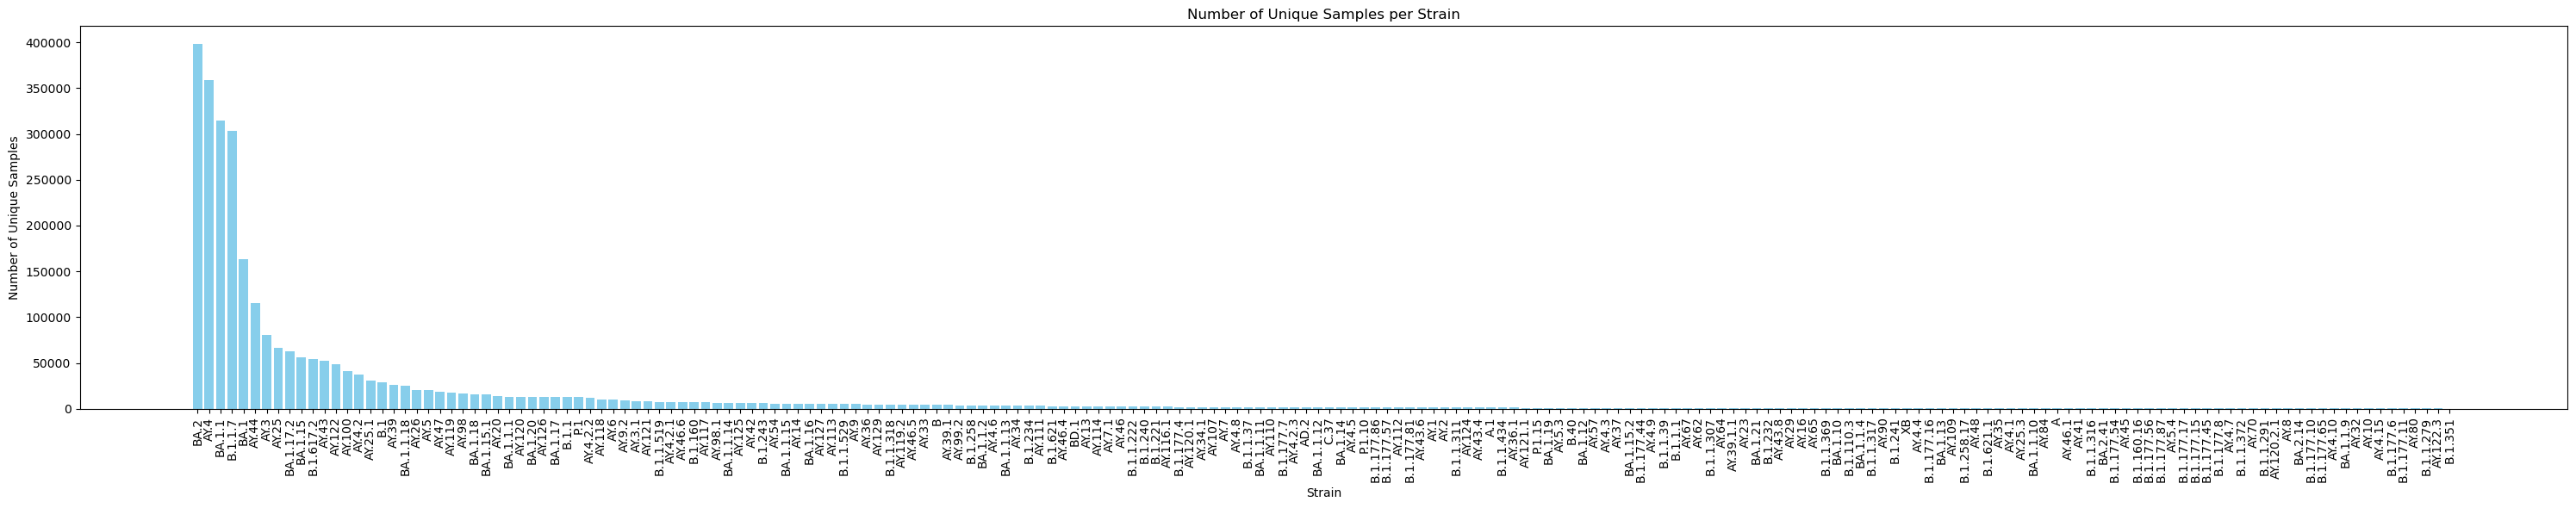

In [20]:
def filter_unique(strains, names, lengths, mutation_paths):
    df = pd.DataFrame({'strain': strains, 'name': names, 'original_len': lengths, 'path': mutation_paths})
    print(f"Initial samples loaded: {len(df)}")

    # リストをタプルに変換した列を一時的に作成
    df['path_tuple'] = df['path'].apply(tuple)
    
    # 'path_tuple' 列に基づいて重複を削除 (最初の出現を残す)
    df_unique = df.drop_duplicates(subset='path_tuple', keep='first')
    print(f"Samples after removing duplicate sequences: {len(df_unique)}")
    
    # 一時的な列を削除
    df_filtered = df_unique.drop(columns=['path_tuple'])

    return df_filtered


df_filtered = filter_unique(path_strains, names, lengths, paths)

df_strains = df_filtered['strain'].value_counts().reset_index()
df_strains.columns = ['Strain', 'Unique_Sample_Count']
df_strains = df_strains.sort_values(by='Unique_Sample_Count', ascending=False)
plt.figure(figsize=(30, 6))
plt.bar(df_strains['Strain'], df_strains['Unique_Sample_Count'], color='skyblue')
plt.xlabel('Strain')
plt.ylabel('Number of Unique Samples')
plt.title('Number of Unique Samples per Strain')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

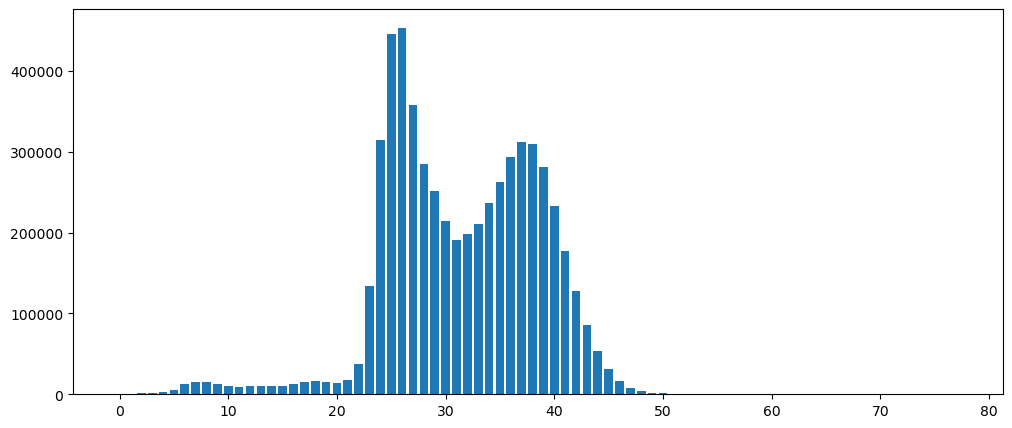

1 891
2 1046
3 1082
4 2949
5 4920
6 12657
7 15308
8 15758
9 12506
10 10860
11 9616
12 9838
13 10555
14 10126
15 10851
16 12945
17 14905
18 15872
19 14908
20 14554
21 17197
22 38055
23 133753
24 314276
25 445220
26 453670
27 357391
28 284577
29 251085
30 214955
31 191442
32 198807
33 210147
34 237200
35 263100
36 293317
37 312458
38 309838
39 281721
40 232897
41 177444
42 127432
43 85251
44 53173
45 30763
46 15874
47 7690
48 3620
49 1959
50 1050
51 685
52 570
53 420
54 401
55 354
56 306
57 268
58 214
59 165
60 94
61 130
62 99
63 55
64 36
65 51
66 44
67 39
68 38
69 39
70 37
71 32
72 25
73 23
74 12
75 10
76 10
77 3


In [21]:
length_count = []
length_i = []
for i in range(0,max(lengths)):
    length_count.append(lengths.count(i))
    length_i.append(i)
plt.figure(figsize=[12,5])
plt.bar(length_i,length_count)
plt.xticks()
plt.show()

for i in length_i:
    if(length_count[i] != 0):
        print(i,length_count[i])

In [22]:
co_occur = []
co_occur_length = []
max_num = 1
max_i = 0
for i in range(len(paths)):
    #print(name[i],mutation_paths[i])
    temp = []
    for j in range(len(paths[i])):
        mutation = paths[i][j].split(',')
        if(len(mutation)>1):
            #print(mutation)
            if(max_num<len(mutation)):
                max_num = len(mutation)
                max_i = i
                print(max_num,max_i)
            temp.append(mutation)
            co_occur_length.append(len(mutation))
    co_occur.append(temp)

2 1
4 6
8 9
9 66
14 66
17 73
22 223
42 390
85 441
104 813854
116 1729787
213 2355427
317 2582634


In [23]:
length_count = []
length_i = []
for i in range(2,max_num+1):
    length_count.append(co_occur_length.count(i))
    length_i.append(i)
    if(length_count[i-2]!=0):
        print(length_i[i-2],',',length_count[i-2])

2 , 13518729
3 , 11696035
4 , 2001174
5 , 2601562
6 , 595119
7 , 46066
8 , 41385
9 , 2236925
10 , 64377
11 , 245796
12 , 2153
13 , 2382
14 , 60939
15 , 854
16 , 544
17 , 420
18 , 2114697
19 , 210
20 , 152
21 , 140
22 , 88
23 , 74
24 , 63
25 , 57
26 , 52
27 , 51
28 , 30
29 , 32
30 , 30
31 , 43
32 , 29
33 , 26
34 , 20
35 , 24
36 , 18
37 , 14
38 , 9
39 , 14
40 , 6
41 , 9
42 , 13
43 , 3
44 , 4
45 , 12
46 , 6
47 , 4
48 , 5
49 , 7
50 , 7
51 , 6
52 , 4
53 , 10
54 , 3
55 , 7
56 , 3
57 , 6
58 , 1
59 , 5
60 , 1
61 , 5
63 , 3
64 , 2
65 , 1
66 , 1
67 , 3
69 , 1
70 , 3
71 , 2
72 , 2
73 , 5
75 , 2
76 , 3
79 , 2
80 , 1
85 , 2
90 , 1
92 , 1
93 , 2
94 , 1
96 , 1
98 , 1
104 , 1
115 , 1
116 , 1
123 , 1
142 , 1
143 , 1
213 , 1
317 , 1


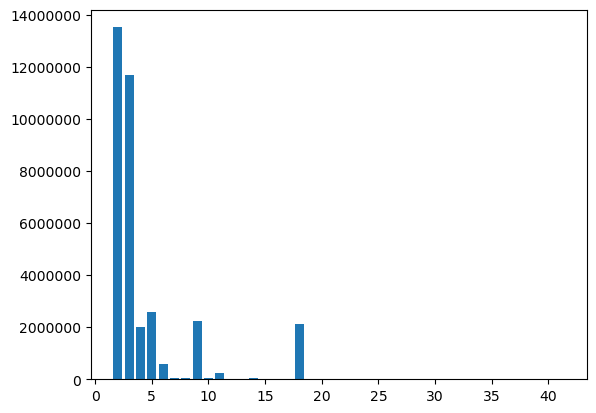

In [24]:
plt.bar(length_i[0:40],length_count[0:40])
plt.xticks()
plt.ticklabel_format(style='plain')
plt.show()